In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow import keras
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from functools import partial
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report, confusion_matrix
plt.rcParams['figure.figsize'] = (15,10)
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['axes.labelsize'] = 15

In [2]:
dt = load_digits()
data = pd.DataFrame(dt.data, columns = dt.feature_names)
data['target'] = dt.target
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [3]:
data.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


The dataset is clean so won't be analyzed any further.

In [4]:
data = load_digits()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.25 )
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
#Neural Network
RegularizedDense = partial(keras.layers.Dense,
                           activation="selu",
                           kernel_initializer="lecun_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01)
                          )

callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=8)
kf = StratifiedKFold(n_splits = 5)
tra, val = [], []
i = 1

for t, v in kf.split(X_train_scaled, y_train):
    
    print(f'split number {i}')
    i += 1
    
    #MLP
    mlp = keras.models.Sequential([
        keras.layers.InputLayer(input_shape = [X_train.shape[1]]),
        RegularizedDense(100),
        RegularizedDense(100),
        RegularizedDense(100),
        keras.layers.Dense(10, activation = 'softmax')])

    mlp.compile( loss = 'sparse_categorical_crossentropy', optimizer = 'Nadam', metrics = ['accuracy'])
    history = mlp.fit(X_train_scaled[t], y_train[t],
                        validation_data = (X_train_scaled[v], y_train[v]),
                        epochs = 30,
                        callbacks = [callback],
                        verbose = 1)
    tra.append(max(list(history.history['accuracy'])))
    val.append(max(list(history.history['val_accuracy'])))

score = pd.DataFrame({'mean_train_score':np.mean(tra), 'mean_valid_score':np.mean(val)}, [0])
score

split number 1
Epoch 1/30
34/34 [==============================] - 1s 12ms/step - loss: 3.8995 - accuracy: 0.7038 - val_loss: 3.1554 - val_accuracy: 0.9333
Epoch 2/30
34/34 [==============================] - 0s 4ms/step - loss: 2.9477 - accuracy: 0.9471 - val_loss: 2.8043 - val_accuracy: 0.9481
Epoch 3/30
34/34 [==============================] - 0s 3ms/step - loss: 2.5955 - accuracy: 0.9712 - val_loss: 2.4876 - val_accuracy: 0.9593
Epoch 4/30
34/34 [==============================] - 0s 4ms/step - loss: 2.2950 - accuracy: 0.9824 - val_loss: 2.2265 - val_accuracy: 0.9444
Epoch 5/30
34/34 [==============================] - 0s 4ms/step - loss: 2.0260 - accuracy: 0.9851 - val_loss: 1.9448 - val_accuracy: 0.9593
Epoch 6/30
34/34 [==============================] - 0s 4ms/step - loss: 1.7829 - accuracy: 0.9879 - val_loss: 1.7197 - val_accuracy: 0.9667
Epoch 7/30
34/34 [==============================] - 0s 4ms/step - loss: 1.5647 - accuracy: 0.9879 - val_loss: 1.5137 - val_accuracy: 0.9593
Epoc

,mean_train_score,mean_valid_score
0,0.995917,0.977734


In [6]:
mlp.evaluate(X_test_scaled, y_test)

15/15 [==============================] - 0s 1ms/step - loss: 0.5145 - accuracy: 0.9667


[0.5144662857055664, 0.9666666388511658]

15/15 [==============================] - 0s 3ms/step


Text(-0.999760000000002, 0.5, 'Predicted')

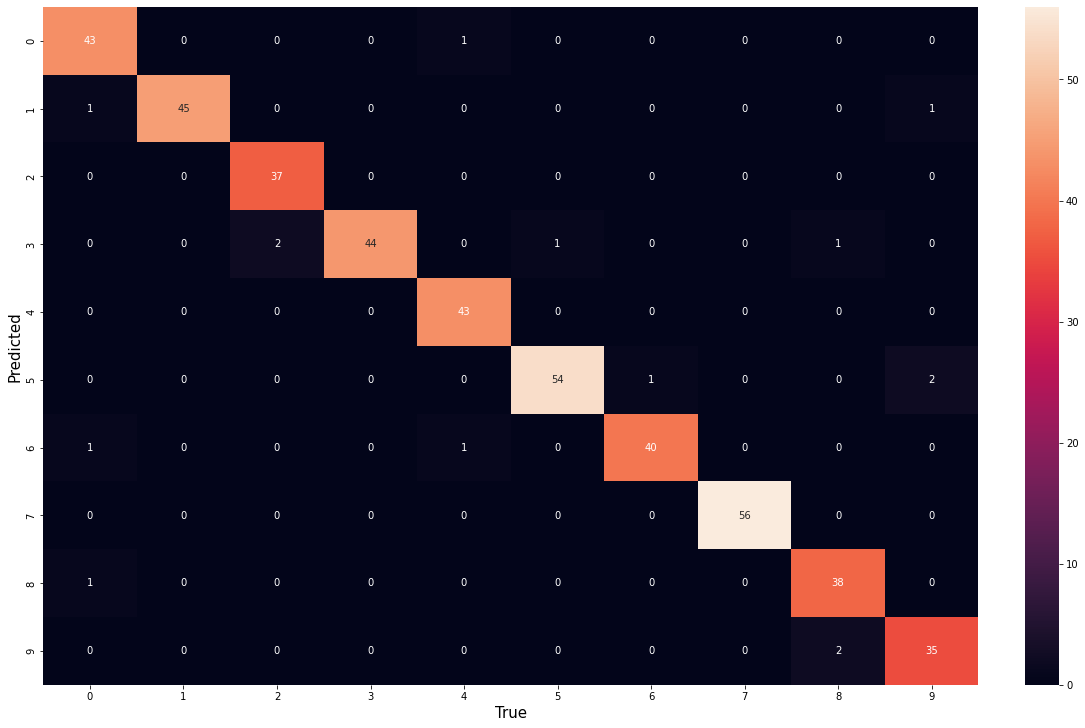

In [7]:
mlp_predictions = np.argmax(mlp.predict(X_test_scaled), axis = 1)
mlp_cm = confusion_matrix(y_test, mlp_predictions)
sns.heatmap(mlp_cm, annot=True)
plt.xlabel('True')
plt.ylabel('Predicted')

In [8]:
print(classification_report(y_test, mlp_predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        44
           1       1.00      0.96      0.98        47
           2       0.95      1.00      0.97        37
           3       1.00      0.92      0.96        48
           4       0.96      1.00      0.98        43
           5       0.98      0.95      0.96        57
           6       0.98      0.95      0.96        42
           7       1.00      1.00      1.00        56
           8       0.93      0.97      0.95        39
           9       0.92      0.95      0.93        37

    accuracy                           0.97       450
   macro avg       0.96      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



Let's try with a convolutional neural network

In [9]:
#Convolutional neural network
DefaultConv2D = partial(keras.layers.Conv2D,
    kernel_size=3, activation='elu', padding="SAME")

callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=7)
kf = StratifiedKFold(n_splits = 5)
tra, val = [], []
i = 1

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 8, 8))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 8, 8))

for t, v in kf.split(X_train_reshaped, y_train):
    
    print(f'split number {i}')
    i += 1
    
    cnn = keras.models.Sequential([
        DefaultConv2D(filters=20, kernel_size=4, input_shape=[X_train_reshaped.shape[1], X_train_reshaped.shape[2], 1]),
        keras.layers.MaxPooling2D(pool_size=2),
        DefaultConv2D(filters=40),
        DefaultConv2D(filters=40),
        keras.layers.MaxPooling2D(pool_size=2),
        DefaultConv2D(filters=80),
        DefaultConv2D(filters=80),
        keras.layers.MaxPooling2D(pool_size=2),
        keras.layers.Flatten(),
        keras.layers.Dense(units=40, activation='elu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(units=20, activation='elu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(units=10, activation='softmax'),
    ])

    cnn.compile( loss = 'sparse_categorical_crossentropy', optimizer = 'Nadam', metrics = ['accuracy'])
    history = cnn.fit(X_train_reshaped[t], y_train[t],
        validation_data = (X_train_reshaped[v], y_train[v]),               
        epochs = 40,
        callbacks = [callback],
        verbose = 1)
    tra.append(max(list(history.history['accuracy'])))
    val.append(max(list(history.history['val_accuracy'])))

score = pd.DataFrame({'mean_train_score':np.mean(tra), 'mean_valid_score':np.mean(val)}, [0])
score

split number 1
Epoch 1/40
34/34 [==============================] - 3s 21ms/step - loss: 2.0733 - accuracy: 0.2591 - val_loss: 1.4170 - val_accuracy: 0.7111
Epoch 2/40
34/34 [==============================] - 0s 12ms/step - loss: 1.2914 - accuracy: 0.5942 - val_loss: 0.6588 - val_accuracy: 0.8852
Epoch 3/40
34/34 [==============================] - 1s 15ms/step - loss: 0.8848 - accuracy: 0.7168 - val_loss: 0.3669 - val_accuracy: 0.9259
Epoch 4/40
34/34 [==============================] - 1s 15ms/step - loss: 0.6346 - accuracy: 0.7967 - val_loss: 0.3088 - val_accuracy: 0.9222
Epoch 5/40
34/34 [==============================] - 1s 15ms/step - loss: 0.4965 - accuracy: 0.8570 - val_loss: 0.1875 - val_accuracy: 0.9593
Epoch 6/40
34/34 [==============================] - 0s 12ms/step - loss: 0.4023 - accuracy: 0.8830 - val_loss: 0.1401 - val_accuracy: 0.9704
Epoch 7/40
34/34 [==============================] - 1s 15ms/step - loss: 0.3988 - accuracy: 0.8784 - val_loss: 0.2385 - val_accuracy: 0.944

,mean_train_score,mean_valid_score
0,0.966039,0.991089


In [10]:
cnn.evaluate(X_test_reshaped, y_test)

15/15 [==============================] - 0s 6ms/step - loss: 0.0960 - accuracy: 0.9867


[0.09595650434494019, 0.9866666793823242]

15/15 [==============================] - 0s 6ms/step


Text(-0.999760000000002, 0.5, 'Predicted')

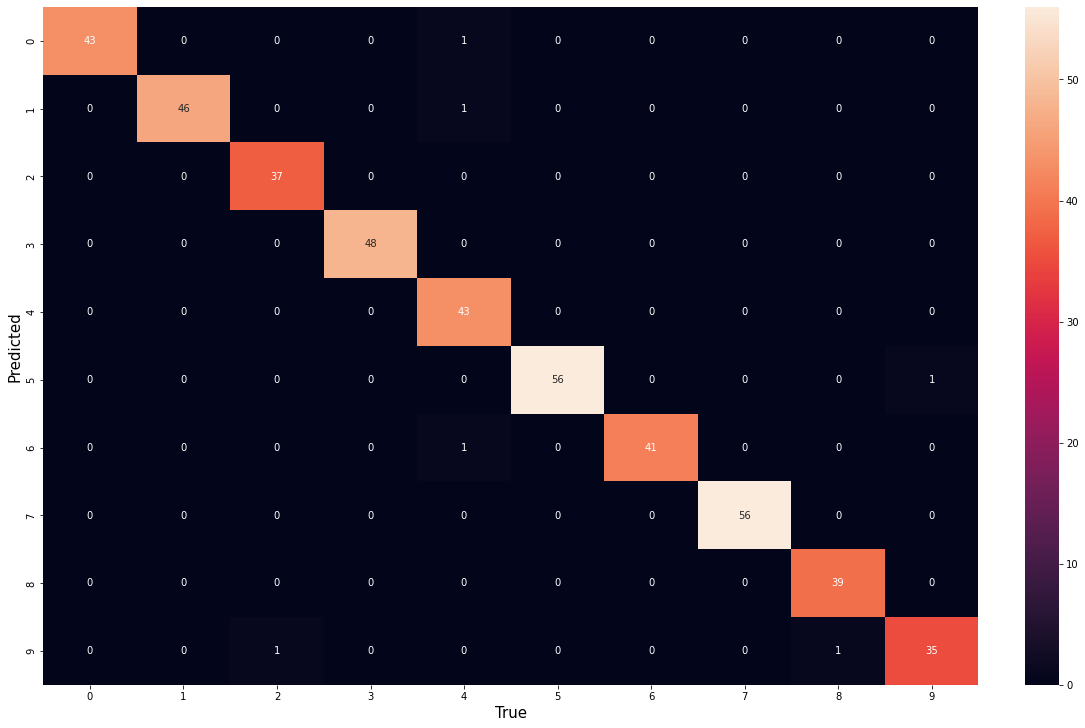

In [11]:
cnn_predictions = np.argmax(cnn.predict(X_test_reshaped), axis = 1)
cnn_cm = confusion_matrix(y_test, cnn_predictions)
sns.heatmap(cnn_cm, annot=True)
plt.xlabel('True')
plt.ylabel('Predicted')

In [12]:
print(classification_report(y_test, cnn_predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        44
           1       1.00      0.98      0.99        47
           2       0.97      1.00      0.99        37
           3       1.00      1.00      1.00        48
           4       0.93      1.00      0.97        43
           5       1.00      0.98      0.99        57
           6       1.00      0.98      0.99        42
           7       1.00      1.00      1.00        56
           8       0.97      1.00      0.99        39
           9       0.97      0.95      0.96        37

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



Compared to the mlp the cnn's predictions are more accurate, there are less missclassification.

Conclusion: CNN performs slightly better than MLP on this dataset.
<br> 
This was expected due to the nature of the problem (image classification)